## Assignment 3

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os; print(os.getcwd())

C:\Users\Sul3y


In [5]:
from sklearn.cluster import DBSCAN


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.cluster import KMeans



In [8]:
from sklearn.metrics import silhouette_score

In [9]:
data=pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')

In [10]:
data.drop('position',inplace=True,axis=1)

# Task 1: Protein Angle Dataset
## The data file “protein-angle-dataset.csv” contains a list of phi and psi combinations that have been observed in a large set of proteins. The angles are measured here in degrees. Answer the following questions using this dataset:

## Show the distribution of phi and psi combinations using:  (a) a scatter plot (b) a 2D histogram Make sure the plots are nice and clean. Can you modify them for better visualization? Hint: consider what would happen if you shift the range of the x- or y-axis on your plots.

In [31]:
#Stores the columns 
phi=data['phi']
psi=data['psi']

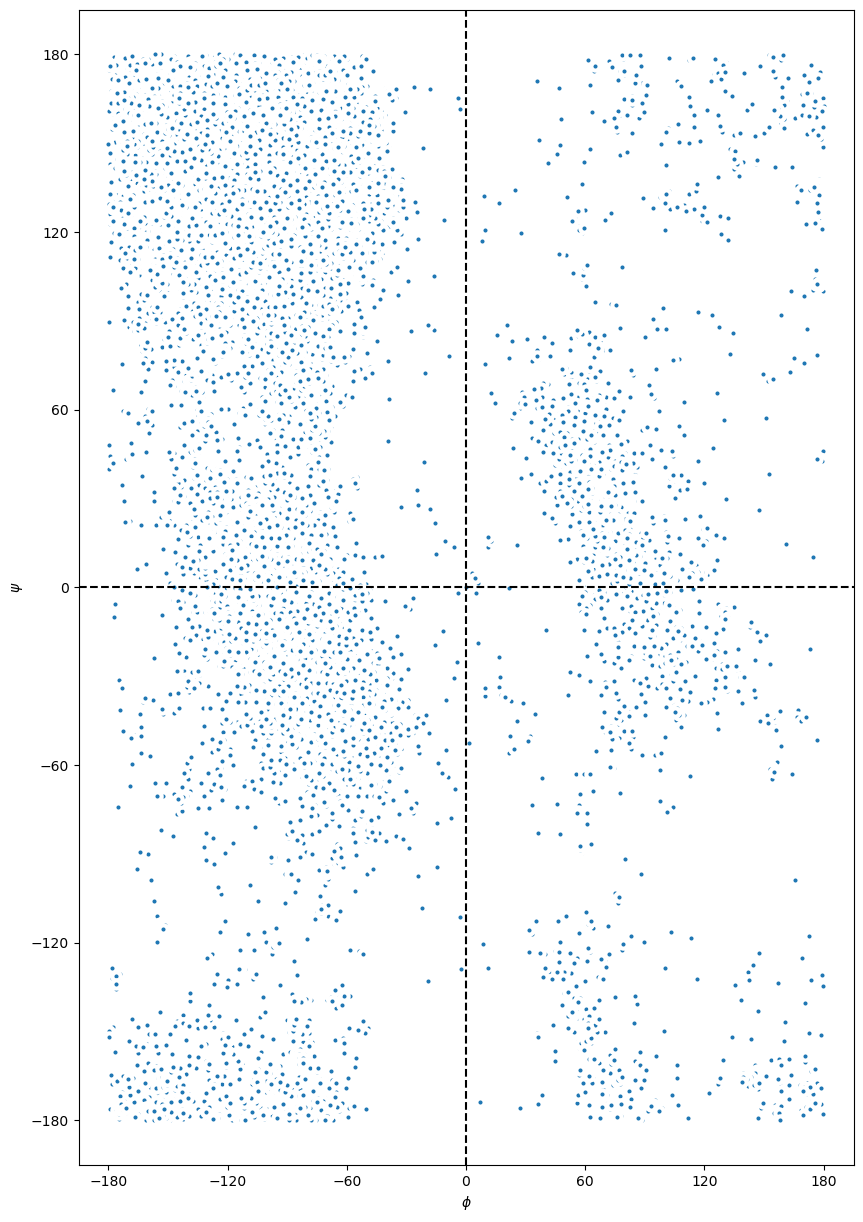

In [13]:
# Calculates the mean of the phi and psi values
mean_phi = np.mean(phi)
mean_psi = np.mean(psi)

# Creates a new figure for plotting with specified size
plt.figure(figsize=(10, 15))

# Adjusts the layout to make sure everything fits well
plt.tight_layout()

# Scatters plot of phi and psi values
plt.scatter(phi, psi, linewidth=3, edgecolors='w')

# Sets the limits of the x-axis
plt.xlim([-195, 195])

# Sets the limits of the y-axis
plt.ylim([-195, 195])

# Sets the label for the x-axis
plt.xlabel('$\phi$')

# Sets the label for the y-axis
plt.ylabel('$\psi$')

# Draws a horizontal line at y=0 
# 'color' sets the line color to black ('k')
# 'linestyle' sets the style of the line to dashed ('--')
plt.axhline(y=0, color='k', linestyle='--')

# Draws a vertical line at x=0 
plt.axvline(x=0, color='k', linestyle='--')

# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))

# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))

# Displays the plot
plt.show()

Ramachadran plot visualizing the dihedral angles of phi and psi in amino acids. The plot is divided into four quadrants for clearer identification of components. 

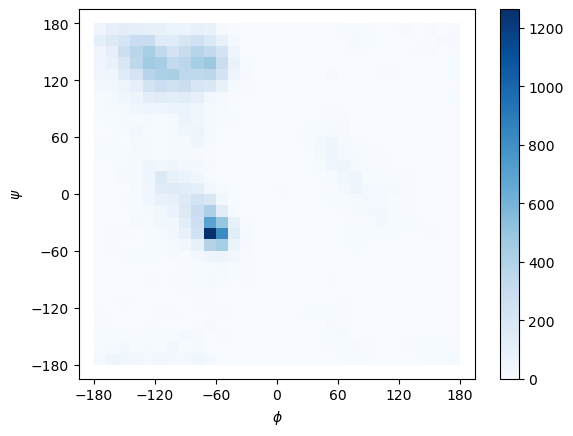

In [14]:
# Creatse a 2D histogram plot for the phi and psi values
# 'bins=30' bins the data into 30x30 grid
# 'cmap' sets the colormap to 'Blues'
plt.hist2d(phi, psi, bins=30, cmap='Blues')

# Adds a colorbar to the plot to indicate the scale of the histogram
plt.colorbar()

# Sets the label for the x-axis
plt.xlabel('$\phi$')

# Sets the label for the y-axis
plt.ylabel('$\psi$')

# Sets the limits of the x-axis
plt.xlim([-195, 195])

# Sets the limits of the y-axis
plt.ylim([-195, 195])

# Sets the ticks on the x-axis at intervals of 60 degrees from -180 to 180
plt.xticks(np.arange(-180, 181, step=60))

# Sets the ticks on the y-axis at intervals of 60 degrees from -180 to 180
plt.yticks(np.arange(-180, 181, step=60))

# Displays the plot
plt.show()


The dense regions can be seen around -60,-60 degrees and -90,120 degrees. The top left consists of beta sheets and the bottom left consists of right handed alpha helices.

## Task 2: Use the k-means clustering method to cluster the phi and psi angle combinations in the data file.



(a) Experiment with different values of k. Suggest an appropriate value of k for this task and
motivate this choice.
(b) Do the clusters found in part (a) seem reasonable

a) The elbow method was used to determine the appropriate K. Variance is how far away the points in the cluster are from eachother. A good K value has a low variance score so we can use this to determine K by relating variance to K and finding the point of diminished return called elbow point. If we go for a even higher K then we increase the complexity of the method which will not be worth the small gains we gain from a marginally reduced variance. A higher K value also reduces readability of the plot. 

b) Yes,the top left quadrant aligns with beta sheets and the bottom left with right handed alpha helices. The X markers are situated in the heart of the clusters indicating that the K means algorithm succeded in identifying the center of each cluster.

In [15]:
data_array=data.to_numpy()

In [16]:
print(data_array)

[['LYS' 'A' -149.312855 142.657714]
 ['PRO' 'A' -44.28321 136.002076]
 ['LYS' 'A' -119.972621 -168.705263]
 ...
 ['ILE' 'B' -113.586448 112.09197]
 ['ASN' 'B' -100.668779 -12.102821]
 ['LYS' 'B' -169.95124 94.23368]]


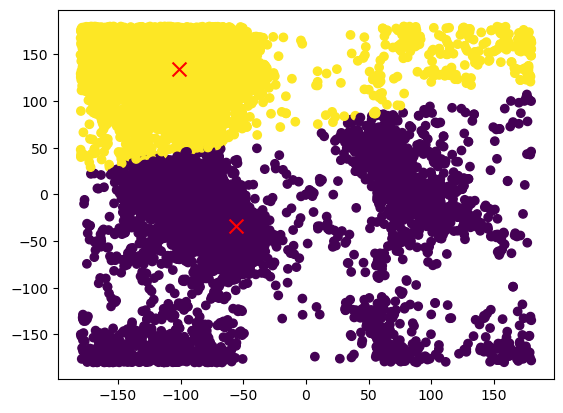

In [17]:
# Select only the numeric columns (for example 'phi' and 'psi') for clustering
data_numeric = data.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
data_array = data_numeric.values

# Number of clusters
k = 2
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()




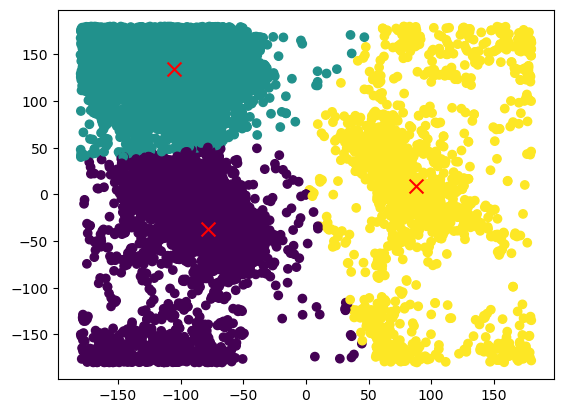

In [18]:
# Number of clusters
k = 3
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()


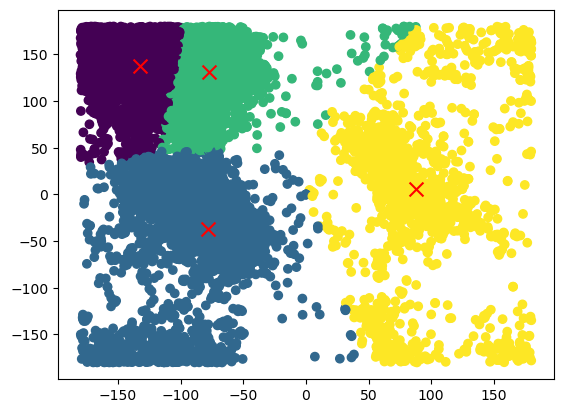

In [19]:
# Number of clusters
k = 4
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k)
# Fit the model to the data
kmeans.fit(data_array)
# Centroids
centroids = kmeans.cluster_centers_
# Labels for each point
labels = kmeans.labels_
# Plot the points with color coding based on labels
plt.scatter(data_array[:, 0], data_array[:, 1], c=labels, cmap='viridis')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

# Show the plot
plt.show()


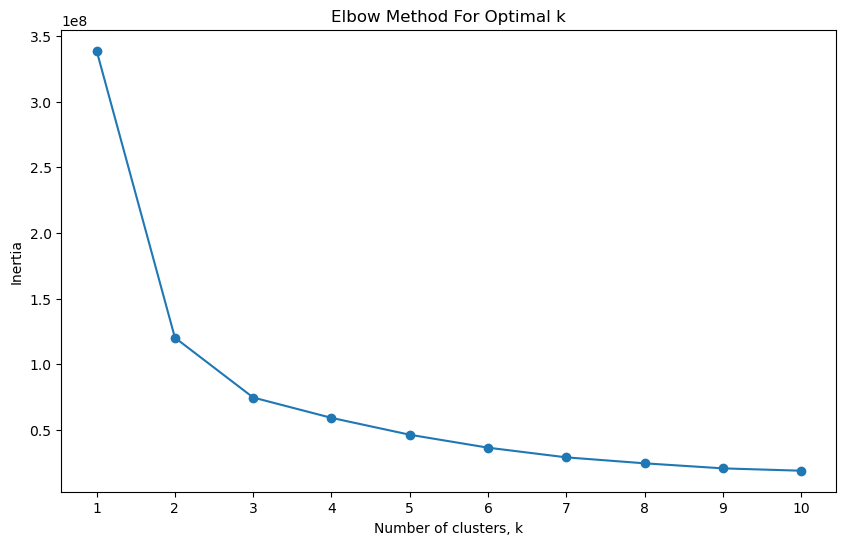

In [20]:
# Assuming 'data' is your dataset
inertia = []
range_of_clusters = range(1, 11)  # Example: checking for 1 to 10 clusters

for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_array)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_of_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(range_of_clusters)
plt.show()



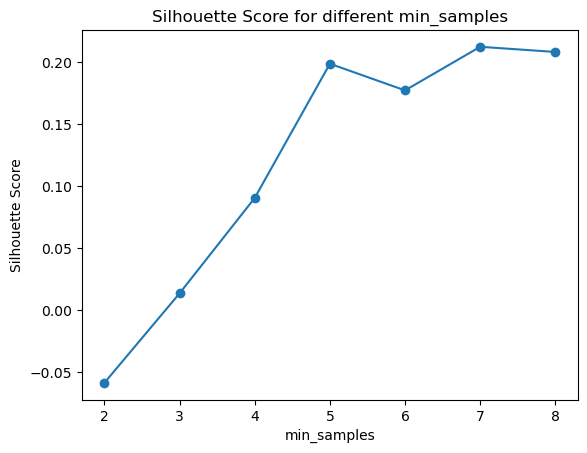

In [21]:
# Standardize the data for clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_array)  

# Set the epsilon value for DBSCAN based on previous analysis
eps_value = 0.15  # Epsilon value chosen based on the elbow method or other analysis

# Define a range of minimum sample values to try with DBSCAN
min_samples_values = range(2, 9)  # Range of min_samples values for experimentation

# Initialize an empty list to store silhouette scores for each min_samples value
silhouette_scores = []

# Loop over the range of min_samples values
for min_samples in min_samples_values:
    # Perform DBSCAN clustering with the current min_samples value
    dbscan = DBSCAN(eps=eps_value, min_samples=min_samples).fit(data_scaled)
    labels = dbscan.labels_  # Cluster labels for each data point

    # Calculate the silhouette score only if valid (not all points in one cluster or noise)
    if len(set(labels)) > 1 and len(set(labels)) < len(data_scaled):
        # Calculate the silhouette score and append it to the list
        score = silhouette_score(data_scaled, labels)
        silhouette_scores.append(score)
    else:
        # Append -1 to indicate invalid or trivial clustering (e.g., no clusters or one big cluster)
        silhouette_scores.append(-1)

# Plot the silhouette scores for each min_samples value
plt.plot(min_samples_values, silhouette_scores, marker='o')  # Line plot with markers
plt.xlabel('min_samples')  # Label for x-axis
plt.ylabel('Silhouette Score')  # Label for y-axis
plt.title('Silhouette Score for different min_samples')  # Title for the plot
plt.show()  # Display the plot


Text(0, 0.5, 'psi')

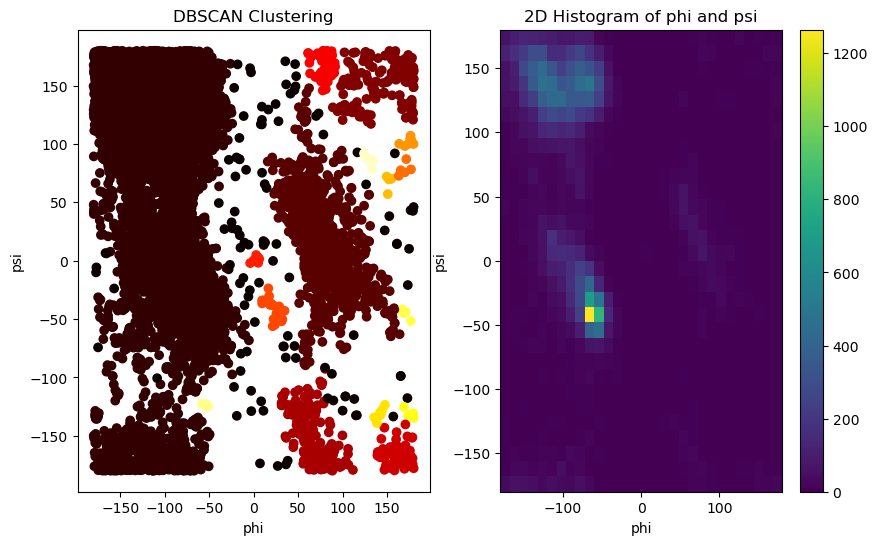

In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X =data_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scaled)

# Extract labels
labels = dbscan.labels_

# Plot results
plt.figure(figsize=(10, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='hot', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')

# 2D histogram
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of phi and psi')
plt.xlabel('phi')
plt.ylabel('psi')

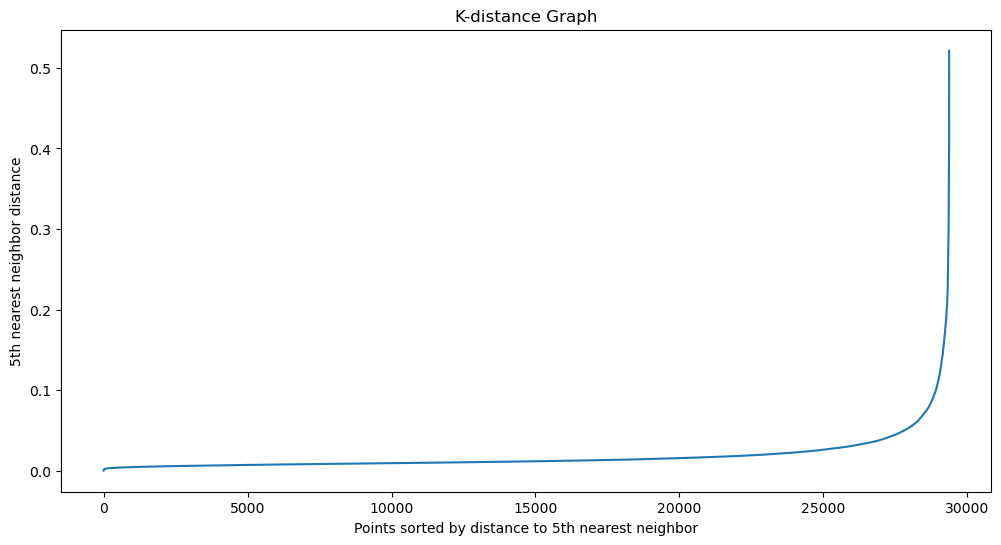

In [23]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Assuming 'phi' and 'psi' are the columns of interest
# X = data[['phi', 'psi']].values

# It's important to standardize the data for DBSCAN
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Use the NearestNeighbors class to find the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(data_scaled)

# Find the distance to the nearest n points for each point
distances, indices = nearest_neighbors.kneighbors(data_scaled)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Taking the distance to the 5th nearest neighbor

# Plot the k-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()


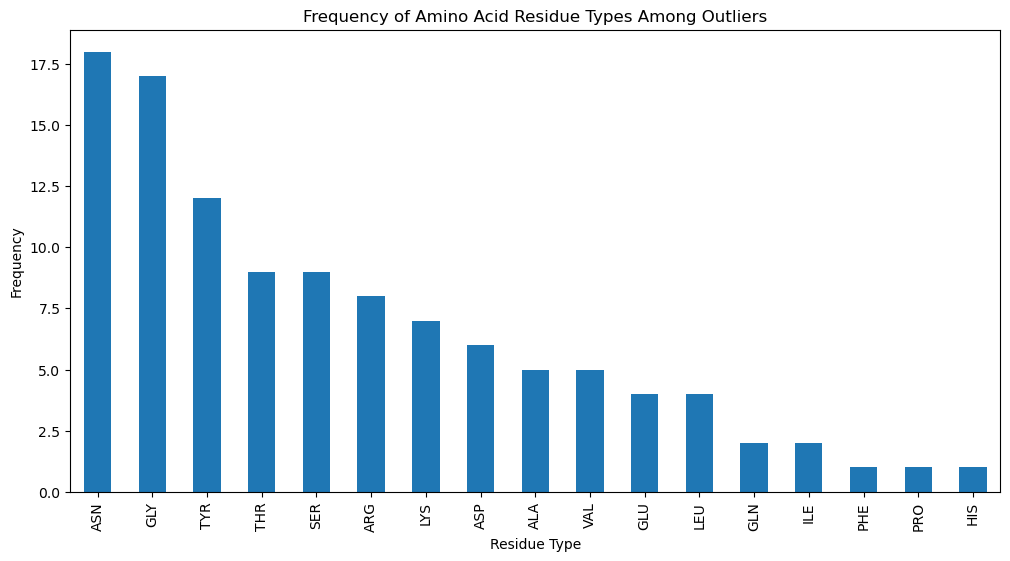

In [24]:

outlier_indices = np.where(labels == -1)[0]

# Filter the DataFrame to include only the outliers
outliers_data = data.iloc[outlier_indices]

# Count the frequency of each residue type among the outliers
# Make sure to replace 'residue_name' with the actual name of your column
outlier_residue_counts = outliers_data['residue name'].value_counts()

# Check if we have any outliers to plot
if not outlier_residue_counts.empty:
    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    outlier_residue_counts.plot(kind='bar')
    plt.title('Frequency of Amino Acid Residue Types Among Outliers')
    plt.xlabel('Residue Type')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("No outliers were detected.")




## Task4: The data file can be stratified by amino acid residue type. Use DBSCAN to cluster the data that have residue type PRO. Investigate how the clusters found for amino acid residues of type PRO differ from the general clusters (i.e., the clusters that you get from DBSCAN with mixed residue types in question 3). Note: the parameters might have to be adjusted from those used in question 3.

C:\Users\Sul3y\AppData\Local\Temp\ipykernel_21836\2725348014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop('position',inplace=True,axis=1)


      residue name chain        phi         psi
1              PRO     A -44.283210  136.002076
17             PRO     A -49.944645  -25.888991
68             PRO     A -76.452014   97.745207
110            PRO     A -53.054020  -27.254912
123            PRO     A -66.751364   94.099782
...            ...   ...        ...         ...
29284          PRO     B -54.565923  -42.141418
29339          PRO     B -66.803083  136.260650
29340          PRO     B -59.612140  160.048387
29347          PRO     B -48.679835  135.208297
29356          PRO     B -61.621274  -41.694960

[1596 rows x 4 columns]


Text(0, 0.5, 'psi')

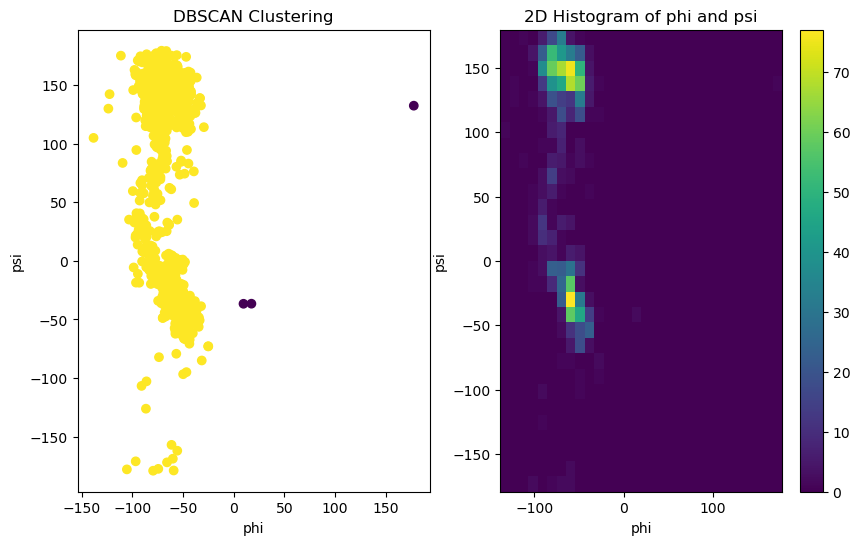

In [25]:
data=pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data [data['residue name'] == 'PRO' ]
residue.drop('position',inplace=True,axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
residue_array = residue_numeric.values
print(residue)
X =residue_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=1, min_samples=3).fit(X_scaled)

# Extract labels
labels = dbscan.labels_

# Plot results
plt.figure(figsize=(10, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')

# 2D histogram
plt.subplot(1, 2, 2)
plt.hist2d(X[:, 0], X[:, 1], bins=30, cmap='viridis')
plt.colorbar()
plt.title('2D Histogram of phi and psi')
plt.xlabel('phi')
plt.ylabel('psi')

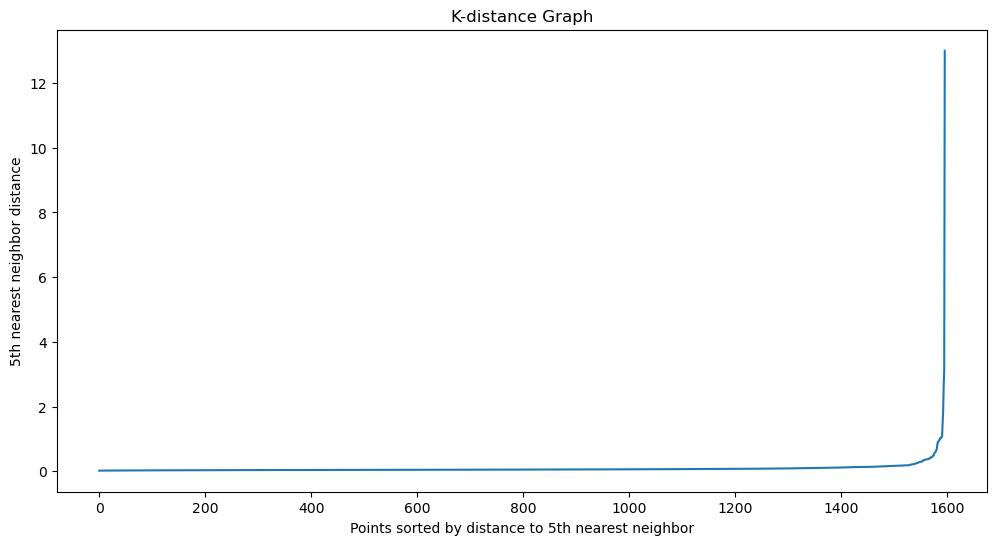

In [26]:
# Load your dataset
# data = pd.read_csv('path_to_your_data.csv')

# Assuming 'phi' and 'psi' are the columns of interest
# X = data[['phi', 'psi']].values

# It's important to standardize the data for DBSCAN
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Use the NearestNeighbors class to find the nearest neighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_scaled)

# Find the distance to the nearest n points for each point
distances, indices = nearest_neighbors.kneighbors(X_scaled)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 4]  # Taking the distance to the 5th nearest neighbor

# Plot the k-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 5th nearest neighbor')
plt.ylabel('5th nearest neighbor distance')
plt.show()

C:\Users\Sul3y\AppData\Local\Temp\ipykernel_21836\1280041623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop(['position'], inplace=True, axis=1)


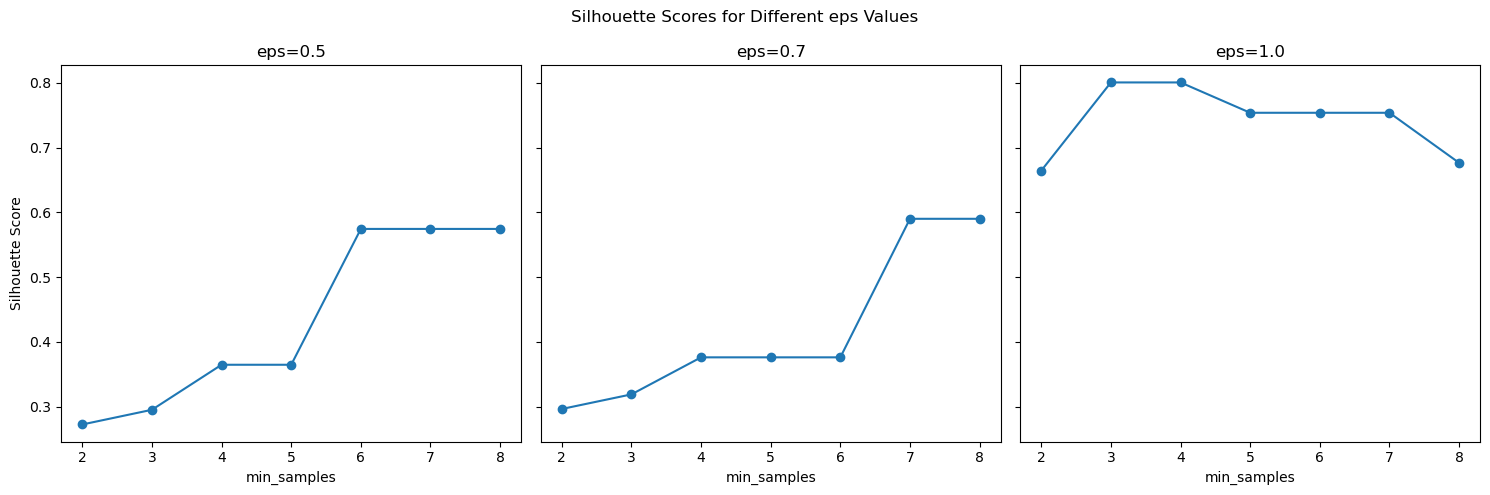

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Load and preprocess the data
data = pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data[data['residue name'] == 'PRO']
residue.drop(['position'], inplace=True, axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])
residue_array = residue_numeric.values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(residue_array)

# Define ranges for eps and min_samples
eps_values = [0.5, 0.7, 1.0]  # Example eps values
min_samples_range = range(2, 9)  # Range of min_samples values

# Create subplots for each eps value
fig, axes = plt.subplots(1, len(eps_values), figsize=(15, 5), sharey=True)

for i, eps in enumerate(eps_values):
    silhouette_scores = []
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        # Compute silhouette score only if valid
        if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
            score = silhouette_score(X_scaled, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(-1)  # Invalid or trivial clustering

    # Plot silhouette scores for this eps value
    ax = axes[i]
    ax.plot(min_samples_range, silhouette_scores, marker='o')
    ax.set_title(f'eps={eps}')
    ax.set_xlabel('min_samples')
    if i == 0:
        ax.set_ylabel('Silhouette Score')

plt.suptitle('Silhouette Scores for Different eps Values')
plt.tight_layout()
plt.show()


C:\Users\Sul3y\AppData\Local\Temp\ipykernel_21836\2867445190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop(['position'], inplace=True, axis=1)


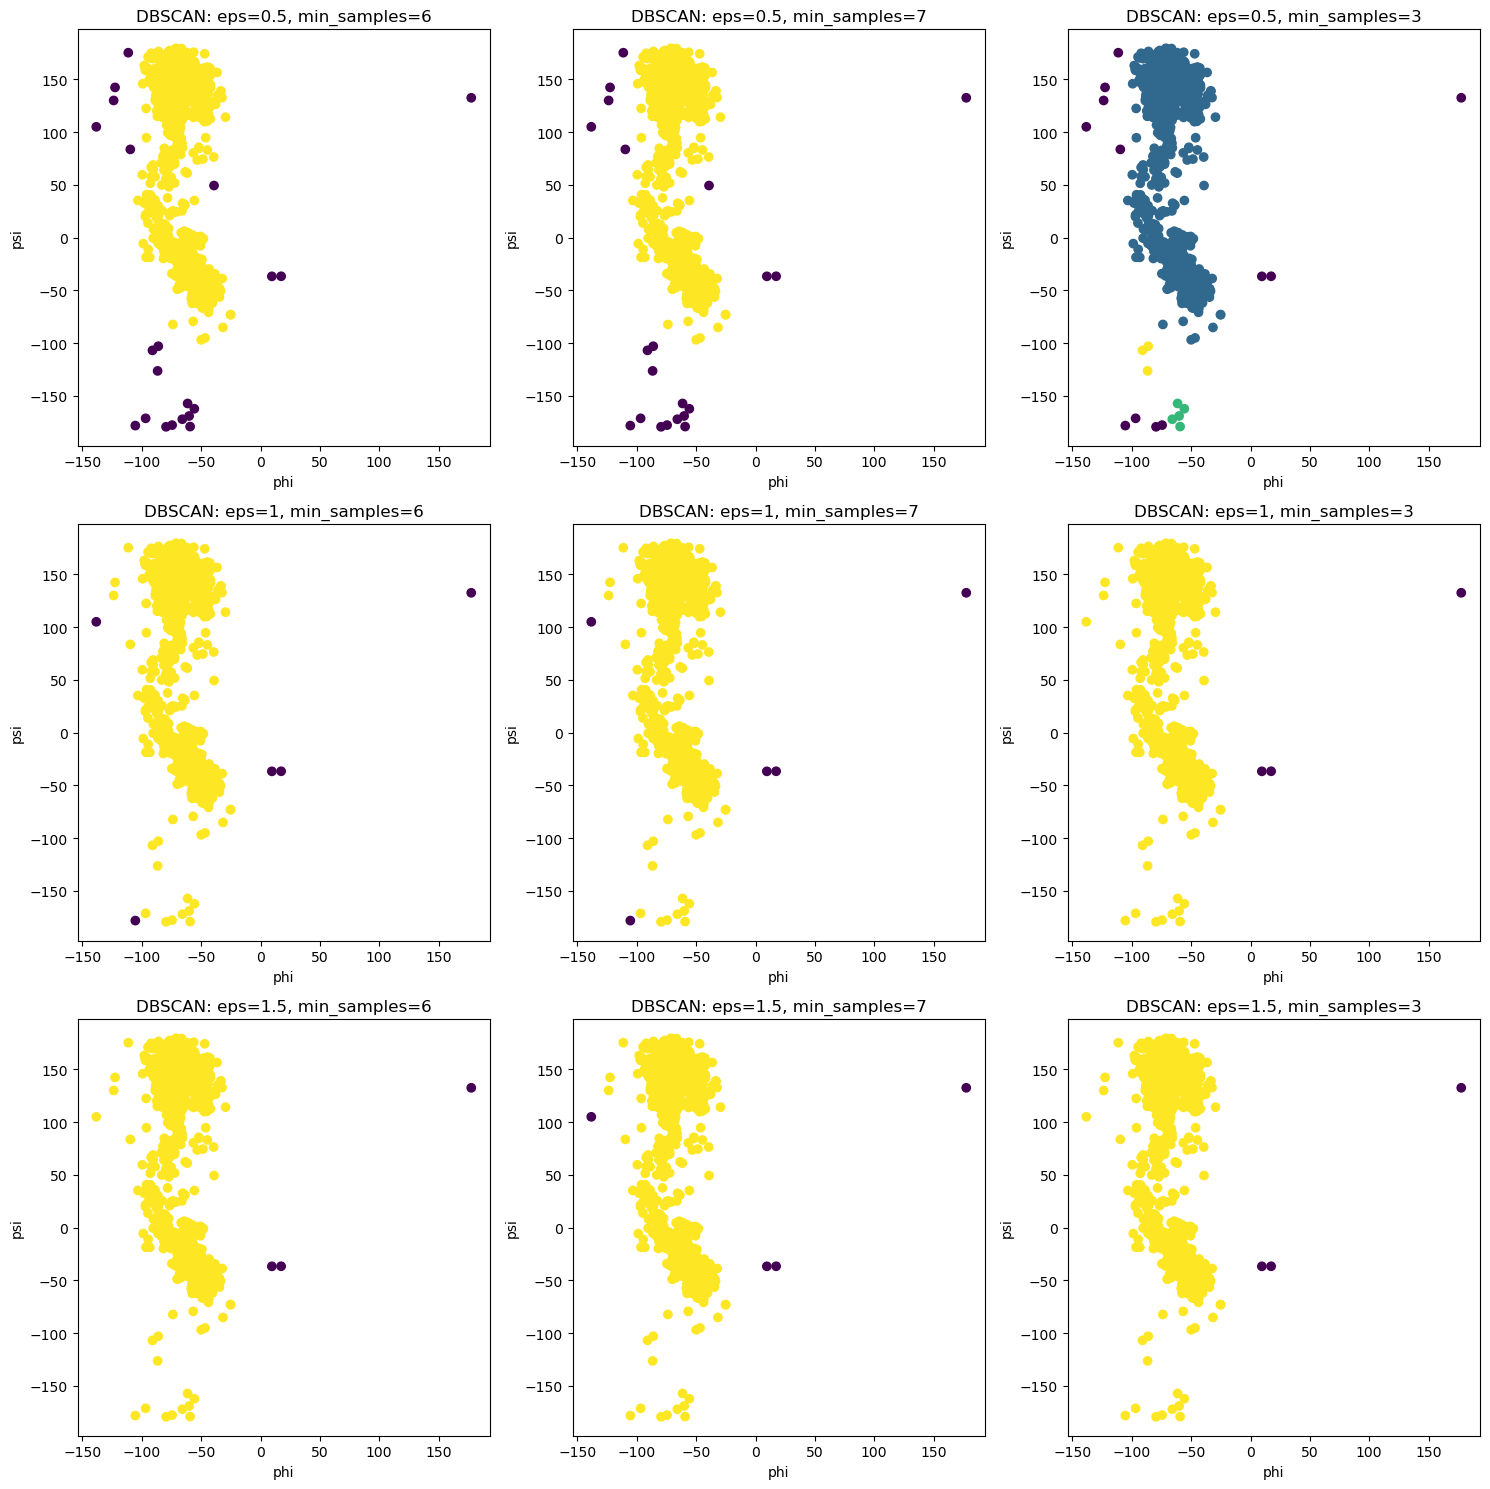

In [28]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data[data['residue name'] == 'PRO']
residue.drop(['position'], inplace=True, axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert to NumPy array
X = residue_numeric.values
X_scaled = StandardScaler().fit_transform(X)

# Define different values for eps and min_samples
eps_values = [0.5, 1, 1.5]  # Example values
min_samples_values = [6, 7, 3]  # Example values

# Create subplots
fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        # Perform DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan.labels_

        # Select the subplot
        ax = axes[i, j]

        # Scatter plot
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
        ax.set_title(f'DBSCAN: eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('phi')
        ax.set_ylabel('psi')

plt.tight_layout()
plt.show()

C:\Users\Sul3y\AppData\Local\Temp\ipykernel_21836\1631023830.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residue.drop('position',inplace=True,axis=1)


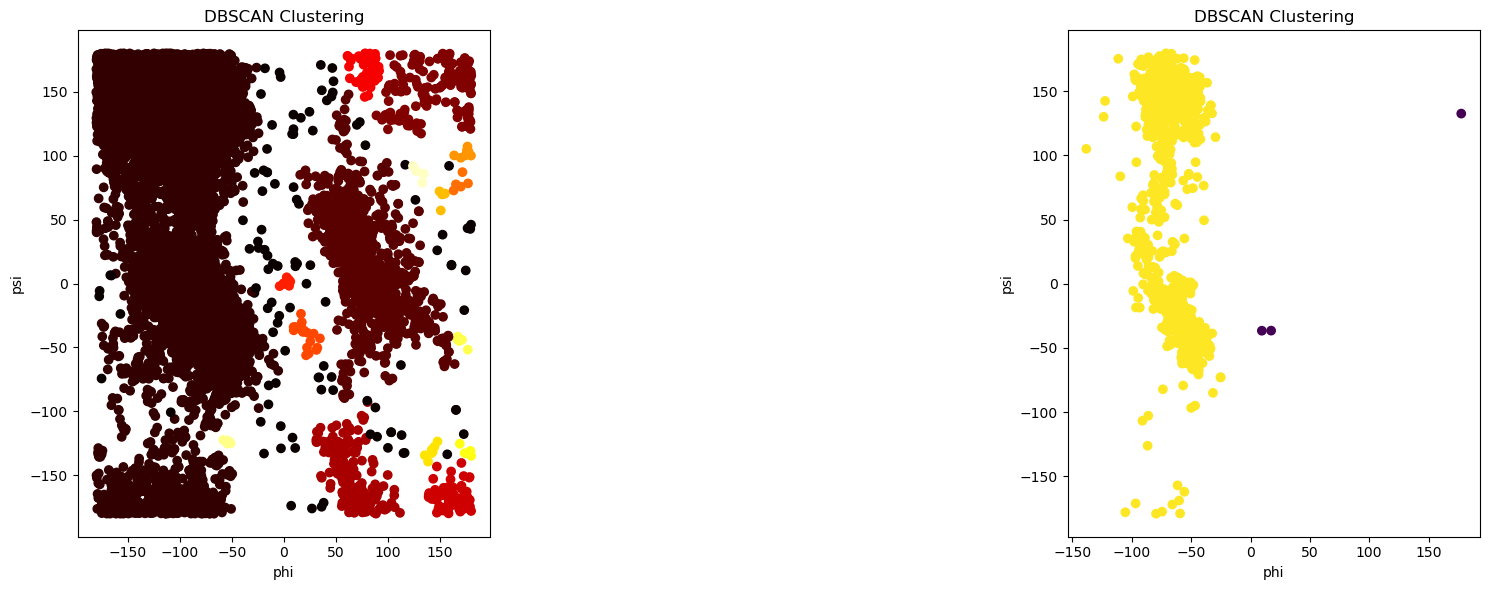

In [29]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots with 1 row and 2 columns
  # figsize can be adjusted as needed

# Now, you can plot on each subplot by indexing into the 'axes' array.

# Plot on the first subplot (index 0)
X =data_array
X_scaled = StandardScaler().fit_transform(X)



dbscan = DBSCAN(eps=0.15, min_samples=5).fit(X_scaled)

# Extract labels
labels = dbscan.labels_

# Plot results
plt.figure(figsize=(15, 6))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='hot', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')



data=pd.read_csv(r'C:\Users\Sul3y\Downloads\protein-angle-dataset.csv')
residue = data [data['residue name'] == 'PRO' ]
residue.drop('position',inplace=True,axis=1)
residue_numeric = residue.select_dtypes(include=[np.number])

# Convert the numeric DataFrame to a NumPy array if not already done
residue_array = residue_numeric.values
P =residue_array
P_scaled = StandardScaler().fit_transform(P)



dbscan = DBSCAN(eps=1, min_samples=3).fit(P_scaled)

# Extract labels
labels = dbscan.labels_



# Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(P[:, 0], P[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('phi')
plt.ylabel('psi')


# Ensure that the plots are not overlapping
plt.tight_layout()

# Display the figure with subplots
plt.show()

